In [2]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

In [3]:
# from torchvision import models
import torch
import torch
import torchvision #provides CV functionality and Datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt
device = 'cuda'#changes CPU to run on GPU

hide_toggle()

In [4]:
#setting up the vgg network
import torchvision.models as models
net =  models.vgg16(pretrained=True)


In [5]:
net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
for name, layer in net.named_modules():
    print(layer)
    print(1)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
#this namelist will be used to name the images later on
n=0
namelist=[]
for name, layer in net.named_modules():
    if 'Sequential' not in str(layer):
        print(name)
        namelist.append(name)
        print(n)
        n+=1

features.0
0
features.1
1
features.2
2
features.3
3
features.4
4
features.5
5
features.6
6
features.7
7
features.8
8
features.9
9
features.10
10
features.11
11
features.12
12
features.13
13
features.14
14
features.15
15
features.16
16
features.17
17
features.18
18
features.19
19
features.20
20
features.21
21
features.22
22
features.23
23
features.24
24
features.25
25
features.26
26
features.27
27
features.28
28
features.29
29
features.30
30
avgpool
31
classifier.0
32
classifier.1
33
classifier.2
34
classifier.3
35
classifier.4
36
classifier.5
37
classifier.6
38


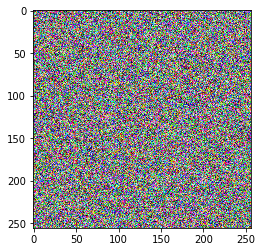

In [8]:
#Generating a random image(random numpy array 3 color channels)
#creating a pytorch variable
#first transform the img into a tensor then define Variable

img_t = 150*torch.randn(1,3,256,256)    #tensor
img = np.uint8(img_t.reshape(256,256,3))
plt.imshow(img)
#print(img_t)
img_var = Variable(img_t, requires_grad=True)#wrap the tensor in pytorch variable

hide_toggle()

In [9]:
#Dog Image
from PIL import Image
from torchvision import transforms
transform = transforms.Compose([            #[1]
    transforms.Resize(256),                    #[2]
    transforms.CenterCrop(224),                #[3]
    transforms.ToTensor(),                     #[4]
    transforms.Normalize(                      #[5]
    mean=[0.485, 0.456, 0.406],                #[6]
    std=[0.229, 0.224, 0.225]                  #[7]
 )])

img = Image.open("dog.jpg")
img_t=transform(img)
batch_t=torch.unsqueeze(img_t,0)

In [11]:
#Registering hooks in each of the layers of the resnet
'''the way it registers is a bit weird 
First is hooks every individual layer inside a bottleneck then the bottleneck itself
after that it hooks the sequential layer as a whole after hooking all the bottleneck layers
finally the entire resnet is hooked'''

visualisation = {}

def hook_fn(m, i, o):
    visualisation[m] = o.clone().detach()

def get_features(net):
    for name, layer in net.named_modules():
        layer.register_forward_hook(hook_fn)

        
get_features(net)
out = net(img_var)
print(out.shape)

torch.Size([1, 1000])


In [12]:
for name in visualisation.keys():
    print(name)

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True

In [28]:

pos=0
size = 256,256
for name in visualisation.keys():
    if 'Sequential' not in str(name):
        num=0
        for values in visualisation.values():
            if num==pos:
                print(values.size())
                print(pos)
                for filters in range(10):
                    if values.size(2)!=1:
                        img = np.asarray(values[0,filters].view(values.size(2),values.size(2)))
                        plt.imsave(str(pos)+'_'+str(namelist[pos])+"_filter_"+str(filters)+"_Tensor_size_"+str(values.size())+".jpg", img)
                        im = Image.open(str(pos)+'_'+str(namelist[pos])+"_filter_"+str(filters)+"_Tensor_size_"+str(values.size())+".jpg")
                        im_resized = im.resize(size)
                        im_resized.save(str(pos)+'_'+str(namelist[pos])+"_filter_"+str(filters)+"_Tensor_size_"+str(values.size())+".jpg", "PNG")
                    else: 
                        break
                pos+=1
                break
            num+=1
            

torch.Size([1, 64, 224, 224])
0
torch.Size([1, 64, 224, 224])
1
torch.Size([1, 64, 224, 224])
2
torch.Size([1, 64, 224, 224])
3
torch.Size([1, 64, 112, 112])
4
torch.Size([1, 128, 112, 112])
5
torch.Size([1, 128, 112, 112])
6
torch.Size([1, 128, 112, 112])
7
torch.Size([1, 128, 112, 112])
8
torch.Size([1, 128, 56, 56])
9
torch.Size([1, 256, 56, 56])
10
torch.Size([1, 256, 56, 56])
11
torch.Size([1, 256, 56, 56])
12
torch.Size([1, 256, 56, 56])
13
torch.Size([1, 256, 56, 56])
14
torch.Size([1, 256, 56, 56])
15
torch.Size([1, 256, 28, 28])
16
torch.Size([1, 512, 28, 28])
17
torch.Size([1, 512, 28, 28])
18
torch.Size([1, 512, 28, 28])
19
torch.Size([1, 512, 28, 28])
20
torch.Size([1, 512, 28, 28])
21
torch.Size([1, 512, 28, 28])
22
torch.Size([1, 512, 14, 14])
23
torch.Size([1, 512, 14, 14])
24
torch.Size([1, 512, 14, 14])
25
torch.Size([1, 512, 14, 14])
26
torch.Size([1, 512, 14, 14])
27
torch.Size([1, 512, 14, 14])
28
torch.Size([1, 512, 14, 14])
29
torch.Size([1, 512, 7, 7])
30
torch.S

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)